<a href="https://colab.research.google.com/github/NaveenGumaste/Python-ML/blob/main/CNN_using_Jetnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

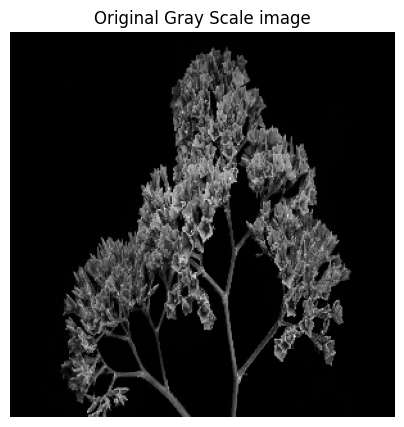

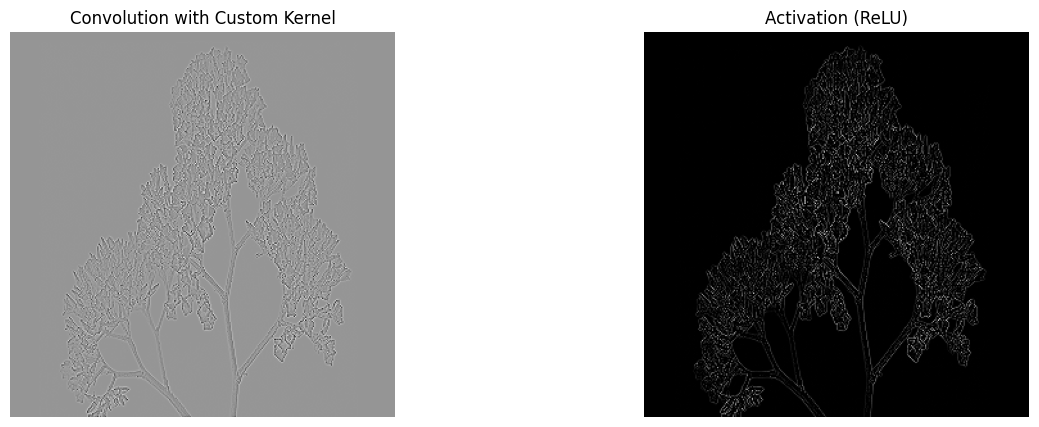

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the custom kernel
custom_kernel = tf.constant([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0],
], dtype=tf.float32)

# Load and preprocess the image
image = tf.io.read_file('/content/drive/MyDrive/tree oled.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# Display the original image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

# Reformat the image
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
custom_kernel = tf.reshape(custom_kernel, [*custom_kernel.shape, 1, 1])

# Convolution layer with the custom kernel
conv_fn = tf.nn.conv2d
image_filtered = conv_fn(
    input=image,
    filters=custom_kernel,
    strides=1,
    padding='SAME',
)

# Display the convolved image
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(image_filtered), cmap='gray')
plt.axis('off')
plt.title('Convolution with Custom Kernel')

# Apply ReLU activation
relu_fn = tf.nn.relu
image_processed = relu_fn(image_filtered)

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(image_processed), cmap='gray')
plt.axis('off')
plt.title('Activation (ReLU)')

plt.show()